In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
actions = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself']
actions = np.array(actions)

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'cold': 0,
 'dizziness': 1,
 'allergic_reaction': 2,
 'snot': 3,
 'unwell': 4,
 'hello': 5,
 'myself': 6}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(200):
        window = []
        for frame_num in range(90):
            res = np.load(os.path.join('keypoints', action, str(sequence+1), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(1400, 90, 1662)

In [7]:
np.array(labels).shape

(1400,)

In [8]:
X = np.array(sequences)

In [9]:
X.shape

(1400, 90, 1662)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
y.shape

(1400, 7)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
X_scale = scaler.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1)

In [15]:
X_test.shape

(140, 90, 1662)

In [16]:
y_test.shape

(140, 7)

In [24]:
def ex_model(model_x, name='model', epoch=100):
    history_model_x = model_x.fit(X_train, y_train, epochs=epoch, validation_split=0.1)
    print('<-------------------------------------------------------------------->')
    model_x.evaluate(X_test, y_test)
    print('<-------------------------------------------------------------------->')
    model_x.summary()
    print('<-------------------------------------------------------------------->')
    # accuracy 
    plt.plot(history_model_x.history['categorical_accuracy'])
    plt.plot(history_model_x.history['val_categorical_accuracy'])
    plt.title('{} accuracy'.format(name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    return history_model_x

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [25]:
model_L64D32 = Sequential()
model_L64D32.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64D32.add(Dense(32, activation='relu'))
model_L64D32.add(Dense(actions.shape[0], activation='softmax'))
model_L64D32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
                     , loss='categorical_crossentropy', metrics='categorical_accuracy')

In [34]:
model_L64D64 = Sequential()
model_L64D64.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64D64.add(Dense(64, activation='relu'))
model_L64D64.add(Dense(actions.shape[0], activation='softmax'))
model_L64D64.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
                     , loss='categorical_crossentropy', metrics='categorical_accuracy')

Epoch 1/50
36/36 [==============================] - 3s 71ms/step - loss: 2.0165 - categorical_accuracy: 0.1517 - val_loss: 1.8776 - val_categorical_accuracy: 0.1667
Epoch 2/50
36/36 [==============================] - 2s 63ms/step - loss: 1.8007 - categorical_accuracy: 0.2540 - val_loss: 1.8102 - val_categorical_accuracy: 0.3175
Epoch 3/50
36/36 [==============================] - 2s 64ms/step - loss: 1.6887 - categorical_accuracy: 0.3474 - val_loss: 1.6325 - val_categorical_accuracy: 0.4286
Epoch 4/50
36/36 [==============================] - 3s 81ms/step - loss: 1.5579 - categorical_accuracy: 0.4206 - val_loss: 1.7577 - val_categorical_accuracy: 0.3254
Epoch 5/50
36/36 [==============================] - 3s 80ms/step - loss: 1.4256 - categorical_accuracy: 0.5000 - val_loss: 1.2674 - val_categorical_accuracy: 0.4921
Epoch 6/50
36/36 [==============================] - 3s 80ms/step - loss: 1.3999 - categorical_accuracy: 0.4974 - val_loss: 1.4766 - val_categorical_accuracy: 0.5079
Epoch 7/50

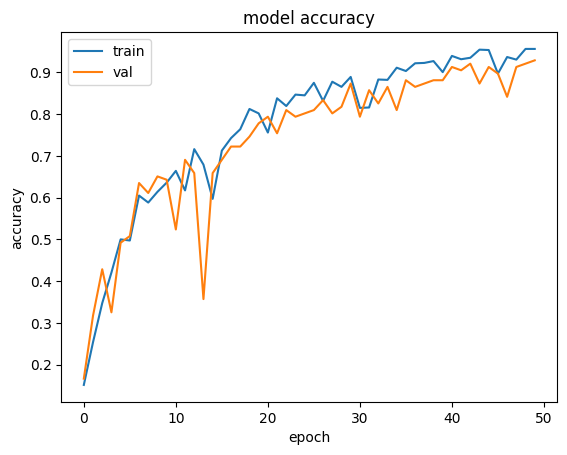

In [26]:
history_L64D32 = ex_model(model_L64D32,epoch=50)

Epoch 1/70
36/36 [==============================] - 4s 98ms/step - loss: 1.9993 - categorical_accuracy: 0.1772 - val_loss: 1.8949 - val_categorical_accuracy: 0.2698
Epoch 2/70
36/36 [==============================] - 3s 71ms/step - loss: 1.8864 - categorical_accuracy: 0.2522 - val_loss: 1.8371 - val_categorical_accuracy: 0.2698
Epoch 3/70
36/36 [==============================] - 3s 74ms/step - loss: 1.8311 - categorical_accuracy: 0.2866 - val_loss: 1.7839 - val_categorical_accuracy: 0.3175
Epoch 4/70
36/36 [==============================] - 3s 72ms/step - loss: 1.7833 - categorical_accuracy: 0.3386 - val_loss: 1.7273 - val_categorical_accuracy: 0.3413
Epoch 5/70
36/36 [==============================] - 3s 73ms/step - loss: 1.7286 - categorical_accuracy: 0.3898 - val_loss: 1.6795 - val_categorical_accuracy: 0.3889
Epoch 6/70
36/36 [==============================] - 3s 73ms/step - loss: 1.6858 - categorical_accuracy: 0.4092 - val_loss: 1.6228 - val_categorical_accuracy: 0.4206
Epoch 7/70

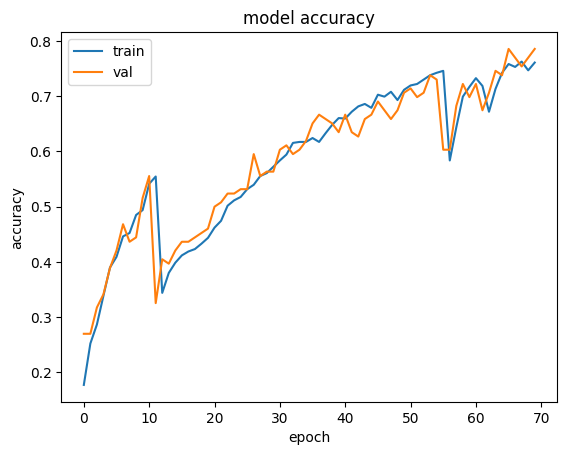

In [35]:
history_L64D64 = ex_model(model_L64D64, epoch=70)

In [38]:
y_preds_1 = model_L64D32.predict(X_test)
y_preds_2 = model_L64D64.predict(X_test)

5/5 [==============================] - 0s 17ms/step


In [39]:
cm1 = confusion_matrix(y_test.argmax(axis=1), y_preds_1.argmax(axis=1))
cm2 = confusion_matrix(y_test.argmax(axis=1), y_preds_2.argmax(axis=1))

In [40]:
cm1_df = pd.DataFrame(cm1,
                     index = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'], 
                     columns = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'])

cm2_df = pd.DataFrame(cm2,
                     index = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'], 
                     columns = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself'])

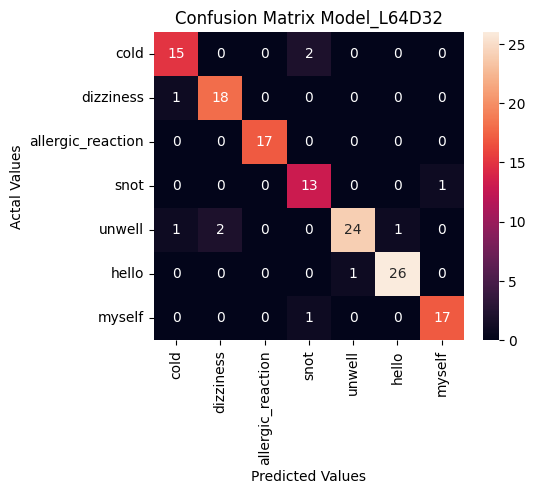

In [41]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm1_df, annot=True)
plt.title('Confusion Matrix Model_L64D32')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

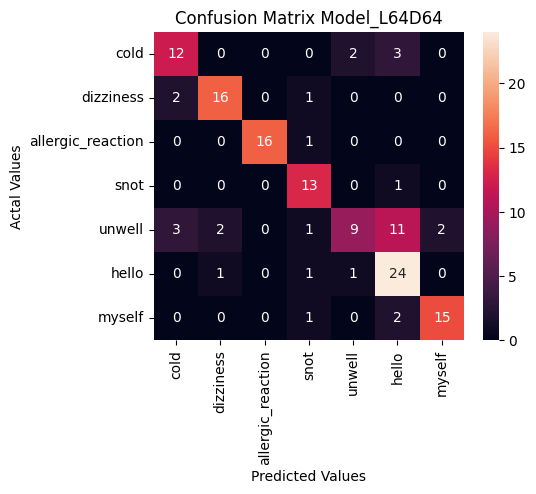

In [42]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm2_df, annot=True)
plt.title('Confusion Matrix Model_L64D64')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()